# Intelligent Systems
# Representation
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))


Implement the PCA procedure with the help of numpy. Compare your results with the results of sklearn's PCA.

In [125]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

In [126]:
# helper method to plot 3D Data, nothing to do here

def make_3D_plot(dataFrame, x_label="sepal_len", y_label="sepal_wid", z_label="petal_len"): 
        
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10  
    
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        ax.plot(group[x_label],group[y_label], group[z_label], 'o', markersize=8, color=colors[key], alpha=0.5, label=key)

    plt.title('Iris Dataset')
    ax.legend(loc='upper right')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.show()

In [129]:
# helper method to plot 2D Data

def make_2D_plot(dataFrame):    
    
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    fig, ax = plt.subplots()
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=dataFrame.columns[0], y=dataFrame.columns[1], label=key, color=colors[key])
    plt.show()

## Import Iris Dataset 

You can use the following link to download the data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [3]:
# load data into dataframe


In [ ]:
irisData

## Plot Data to get an overview

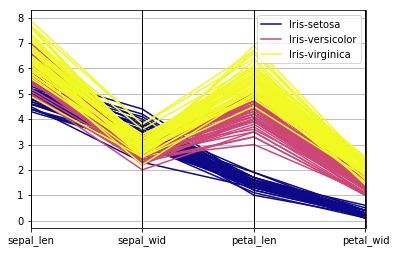

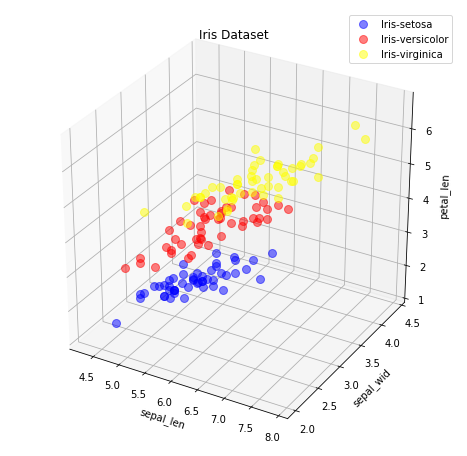

In [4]:
# vertical line plot very useful for feature analysis 



---

## Step 1: Standardize Data 

In [12]:
irisStandardizedData

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
5,-0.537178,1.957669,-1.170675,-1.050031,Iris-setosa
6,-1.506521,0.800654,-1.341272,-1.181504,Iris-setosa
7,-1.021849,0.800654,-1.284407,-1.312977,Iris-setosa
8,-1.748856,-0.356361,-1.341272,-1.312977,Iris-setosa
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa


## Step 2: Create Covariance Matrix

In [13]:
# calculate covariance matrix


## Step 3: Find Eigenvecotrs and Eigenvalues to the Matrix

In [64]:
# eigendecomposition of covariance matrix

print(eigenValues)
print(eigenVectors)

[ 2.93035378  0.92740362  0.14834223  0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Plot Eigenvalue Distribution to find vectors with the highest variance

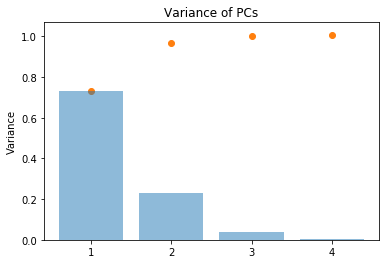

In [39]:
# nothing to do here, execute with eigenValues

objects = [1,2,3,4]
y_pos = [1,2,3,4]

# need eigenValues as numpy array
performance = eigenValues/4
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.scatter(x=[1,2,3,4], y=np.cumsum(eigenValues/4))
plt.ylabel('Variance')
plt.title('Variance of PCs')
 
plt.show()

## Step 4: Project Original Data onto new PC coordinates (new feature space)

### Plot new data and feature space

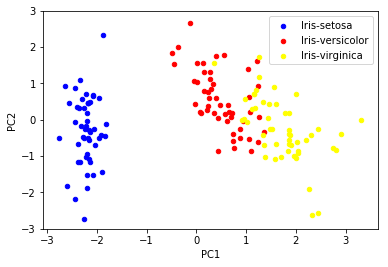

---

## Step 0: Do it with sklearn :)

In [173]:
from sklearn.decomposition import PCA as sklearnPCA


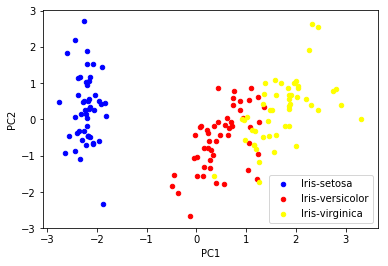

In [168]:
# plot and compare 